## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df.query('(group == "treatment" and landing_page !="new_page") or (group != "treatment" and landing_page =="new_page")').count()[0]

3893

f. Do any of the rows have missing values?

In [7]:
df.isnull().sum().sum()

0

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# remove the messy rows
messy_rows = df.query("(group == 'treatment' and landing_page !='new_page') or (group != 'treatment' and landing_page =='new_page')")
messy_rows

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
...,...,...,...,...,...
294014,813406,2017-01-09 06:25:33.223301,treatment,old_page,0
294200,928506,2017-01-13 21:32:10.491309,control,new_page,0
294252,892498,2017-01-22 01:11:10.463211,treatment,old_page,0
294253,886135,2017-01-06 12:49:20.509403,control,new_page,0


In [9]:
df2 = df.drop(index = messy_rows.index)
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

In [13]:
df2

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


a. How many unique **user_id**s are in **df2**?

In [14]:
# unique users
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [15]:
# non-unique user_id
df2[df2.duplicated(subset=['user_id'])== True]['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [16]:
df2[df2.duplicated(subset=['user_id'], keep=False)== True]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [17]:
df2.drop(index = df2[df2.duplicated(subset=['user_id'])== True].index, inplace = True)

In [18]:
# assure that the row is removed
df2[df2.duplicated(subset=['user_id'])== True]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
df2.query("group == 'control'")['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
df2.query("group == 'treatment'")['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [22]:
(df2.landing_page == 'new_page').mean()

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Your answer goes here.**

There is no sufficient evidence to say that the new treatment page is better than the old one. The probability of conversion is very tiny. Whether the user is in the control group or the treatment group, the probability of conversion is very low. They might need more time to send the new page to all people since the probability of an individual receiving the new page is 50 %.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

$H_0: p_{new}-p_{old} \le 0$

$H_1: p_{new}-p_{old}>0 $

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [23]:
# converted rate for the new page equal to the converted success rate regardless of page
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [24]:
# converted rate for the old_page equal to the converted success rate regardless of page
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [25]:
# the sample size of the new_page equal to to the ones in ab_data.csv.
n_new = df2.loc[df2.landing_page == 'new_page'].shape[0]
n_new

145310

d. What is $n_{old}$?

In [26]:
# the sample size of the old_page equal to to the ones in ab_data.csv.
n_old = df2.loc[df2.landing_page == 'old_page'].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [27]:
new_page_converted = np.random.binomial(1,size=n_new, p=p_new)
# new_page_converted = np.random.choice([0, 1], size = n_new, p = [1-p_new, p_new])
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [28]:
old_page_converted = np.random.binomial(1, size=n_old, p=p_old)
# old_page_converted = np.random.choice([0, 1], size = n_old, p = [1-p_old, p_old])
old_page_converted

array([0, 0, 0, ..., 0, 1, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [29]:
# computer the mean of the two pages and get the difference between them since they have different sizes
new_page_converted.mean() - old_page_converted.mean()

5.322920473978254e-05

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [30]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(1,size=n_new, p=p_new) # bootstrapping
    old_page_converted = np.random.binomial(1, size=n_old, p=p_old) # bootstrapping
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

In [31]:
# convert list into array
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

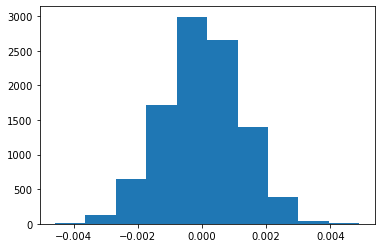

In [32]:
plt.hist(p_diffs); 
# Yes, it is a normal distribution as I expected.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [33]:
df_new_page = df2.loc[df2.landing_page == 'new_page']
df_old_page = df2.loc[df2.landing_page == 'old_page']
obs_diff = df_new_page.converted.mean() - df_old_page.converted.mean()
obs_diff

-0.0015782389853555567

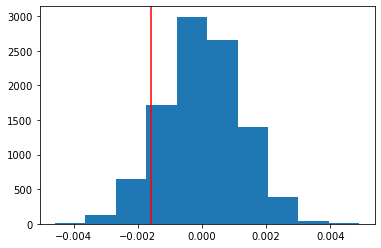

In [34]:
# see where the obs_diff located in the distribution
plt.hist(p_diffs)
plt.axvline(x=obs_diff, color='r');

In [35]:
# P-value
(p_diffs > obs_diff).mean()

0.9004

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

This value is called P-value in scientific studies. We fail to reject the null since we don't have statistically significant evidence to say that the population difference Is greater than zero. Since the P-value is greater than the type-I error of 5%.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [36]:
import statsmodels.api as sm

converted_old = len(df2.query("landing_page == 'old_page' and converted == 1"))
converted_new = len(df2.query("landing_page == 'new_page' and converted == 1"))
n_old = len(df2.query('landing_page == "old_page"'))
n_new = len(df2.query('landing_page == "new_page"'))

In [37]:
converted_old, converted_new

(17489, 17264)

In [38]:
n_old, n_new

(145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

In [39]:
z_score, p_value = sm.stats.proportions_ztest([converted_old, converted_new], [n_old, n_new], alternative = 'smaller')
z_score, p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**



The P-value of the z-score is similar to the one we computed above. The P-value and the z-score say that we fail to reject the null. We are just 5% confident that the new page conversion rate is greater than the old page conversion rate since the P-value is greater than the type I error rate of 5%.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

I will use the logistic regression technique because the dependent variable has two outcomes.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [40]:
df2.head(1)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0


In [41]:
# we will use the treatment column so that zero stands for control and one stands for treatment
pd.get_dummies(df2.group)

,control,treatment
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
294473,1,0
294474,1,0
294475,1,0
294476,1,0


In [42]:
# Create a dummy variable, and drop control column
df2['ab_page'] = pd.get_dummies(df2.group).drop(columns = ['control'])

In [43]:
# create intercept column
df2['intercept'] = 1
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [44]:
log_model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [45]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 16 Jul 2021   Pseudo R-squ.:               8.077e-06
Time:                        13:13:14   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [46]:
ab_page_coef = results.params[1]
1/np.exp(ab_page_coef)

1.0151020136964686

The new page is 1.015 less likely to be converted than the old page.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.**

`ab_page` P-value = 0.190. The coefficient is not statistically significant because the P-value of ab_page is greater than the type-I error of 0.05. Here, the P-value tells us whether or not a particular variable is useful for predicting the response. In regression, the P-value helps us to know if a particular variable is useful for predicting the response.

- The test type of part II is different from this part. In this part, it's a two-tailed test, whereas, in part II, it's a one-tailed test. So, the value differs in this part from part II.
    - In part II
    
     - **Null**   $$H_0: p_{new}-p_{old} \le 0$$
     - **Alternative**   $$H_1: p_{new}-p_{old}>0 $$
    
    where **$p_{old}$** and **$p_{new}$** are the converted rates for the old and new pages.
    - In this part
        - **Null**: The coefficient is equal to zero
        - **Alternative**: The coefficient is not equal to zero    

We got that the new page is 1.015 less likely to be converted than the old page in this part. We failed to reject the null in both parts.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

 Maybe other factors might help to best predict the conversion rate. The disadvantage of the complexity of the model increases when adding more terms.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [47]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [48]:
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [49]:
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [50]:
### Create the necessary dummy variables
df_new[['CA', 'UK','US']]= pd.get_dummies(df_new['country'])
df_new.head(1)

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0


In [51]:
df_new['intercept'] = 1

In [52]:
log_model = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'US', 'ab_page']])
results = log_model.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2021-07-16 13:13 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9794    0.0127  -155.4145  0.0000  -2.0044  -1.9544
CA           -0.0506    0.0284    -1.7835  0.0745  -0.1063   0.0050
US           -0.0099    0.0133    -0.7433  0.4573  -0.0359   0.0162
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
==================================================================

"""

From the result above, We can say that the country does not affect the conversion since CA and US are not statistically significant.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [53]:
# create an interaction column between ab_page and countries
df_new['interaction_US_page'] = df_new.US * df_new.ab_page
df_new['interaction_CA_page'] = df_new.CA * df_new.ab_page

In [54]:
### Fit Your Linear Model And Obtain the Results
y = df_new['converted']
X = df_new[['intercept', 'ab_page', 'CA', 'US', 'interaction_CA_page', 'interaction_US_page']]
log_model = sm.Logit(y, X)
results = log_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Fri, 16 Jul 2021   Pseudo R-squ.:               3.482e-05
Time:                        13:13:20   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept              -1.9922      0.016   -123.457      0.000      -2.024      -1.961
ab_page                 0.0108      0.023      0.475      0.635      -0.034       0.056
CA                     -0.0118      0.040     -0.296      0.767      -0.090       0.066
US                      0.0057      0.019      0.306      0.760      -0.031       0.043
interaction_CA_page    -0.0783      0.057     -1.378      0.168      -0.190       0.033
interaction_US_page    -0.0314      0.027     -1.181      0.238      -0.084       0.021
=======================================================================================
"""

All coefficients don't influence the conversion rate since they are not statistically significant.

<a id='conclusions'></a>
## Conclusions

***Do you think there is sufficient evidence to say that the new treatment page leads to more conversions?***
#### Answer from different perspectives: 
- **probability:**
    - There is no sufficient evidence to say that the new treatment page is better than the old one. The probability of conversion is very tiny. Whether the user is in the control group or the treatment group, the probability of conversion is very low. They might need more time to send the new page to all people since the probability of an individual receiving the new page is 50 %.
- **A/B testing:**
    - We fail to reject the null since we don't have statistically significant evidence to say that the population difference Is greater than zero. Since the P-value is greater than the type-I error of 5%.
    - The P-value of the z-score is similar to the one we computed in A/B testing. The P-value and the z-score say that we fail to reject the null. We are just 5% confident that the new page conversion rate is greater than the old page conversion rate since the P-value is greater than the type I error rate of 5%.
- **Regression**
    - We failed to reject the null in all cases. When we used only landing page, when we only used landing page and countries, and even when we used landing page, countries, and the interaction between them.n between the country and ab_page, all the coefficients are not statistically significant. 
\
>> ***From these results, we don't have any evidence to reject the null. We don't have any evidence to prove that the new page conversion rate is better that the old page conversion rate.***